About Dataset

Context: The leading cause of death in the developed world is heart disease. Therefore there needs to be work done to help prevent the risks of of having a heart attack or stroke.

Content: Use this dataset to predict which patients are most likely to suffer from a heart disease in the near future using the features given.


ge : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [80]:
library(dplyr)
library(gmodels)
library(descr)
library(ggplot2)

In [2]:
heart=read.csv(file.choose(),header = T,stringsAsFactors = T)

In [3]:
head(heart)

ï..age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [81]:
glimpse(heart)

Rows: 303
Columns: 14
$ ï..age   <int> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, 5~
$ sex      <int> 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1~
$ cp       <int> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3, 0~
$ trestbps <int> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, 1~
$ chol     <int> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 2~
$ fbs      <int> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0~
$ restecg  <int> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1~
$ thalach  <int> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 1~
$ exang    <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0~
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2, 0~
$ slope    <int> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1~
$ ca       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0~
$ thal     <int> 1

In [82]:
dim(heart)

[1] 303  14

In [83]:
heart_data=heart %>%
  mutate(sex = if_else(sex == 1, "MALE", "FEMALE"),
         fbs = if_else(fbs == 1, ">120", "<=120"),
         exang = if_else(exang == 1, "YES" ,"NO"),
         cp = if_else(cp == 1, "ATYPICAL ANGINA",
                      if_else(cp == 2, "NON-ANGINAL PAIN", "ASYMPTOMATIC")),
         restecg = if_else(restecg == 0, "NORMAL",
                           if_else(restecg == 1, "ABNORMALITY", "PROBABLE OR DEFINITE")),
         slope = as.factor(slope),
         ca = as.factor(ca),
         thal = as.factor(thal),
         target = if_else(target == 1, "Present", "Absent")
         )

In [84]:
# Covrting the variables into factor
heart_data$sex = as.factor(heart_data$sex)
heart_data$cp = as.factor(heart_data$cp)
heart_data$fbs = as.factor(heart_data$fbs)
heart_data$restecg = as.factor(heart_data$restecg)
heart_data$exang = as.factor(heart_data$exang)
heart_data$slope = as.factor(heart_data$slope)
heart_data$cp=as.factor(heart_data$cp)
heart_data$thal = as.factor(heart_data$thal)
heart_data$target = as.factor(heart_data$target)

In [85]:
dim(heart_data)

[1] 303  14

In [86]:
str(heart_data)

'data.frame':	303 obs. of  14 variables:
 $ ï..age  : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : Factor w/ 2 levels "FEMALE","MALE": 2 2 1 2 1 2 1 2 2 2 ...
 $ cp      : Factor w/ 3 levels "ASYMPTOMATIC",..: 1 3 2 2 1 1 2 2 3 3 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : Factor w/ 2 levels "<=120",">120": 2 1 1 1 1 1 1 1 2 1 ...
 $ restecg : Factor w/ 3 levels "ABNORMALITY",..: 2 1 2 1 1 1 2 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : Factor w/ 2 levels "NO","YES": 1 1 1 1 2 1 1 1 1 1 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : Factor w/ 3 levels "0","1","2": 1 1 3 3 3 2 2 3 3 3 ...
 $ ca      : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ thal    : Factor w/ 4 levels "0","1","2","3": 2 3 3 3 3 2 3 4 4 3 ...
 $ target  : Factor w/ 2 levels "Absent","Present": 2 2 2 2 2 2 2 2 2 2 ...


In [87]:
CrossTable(heart$target)

   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

|       0 |       1 |
|---------|---------|
|     138 |     165 |
|   0.455 |   0.545 |
|---------|---------|


# Data Visulization

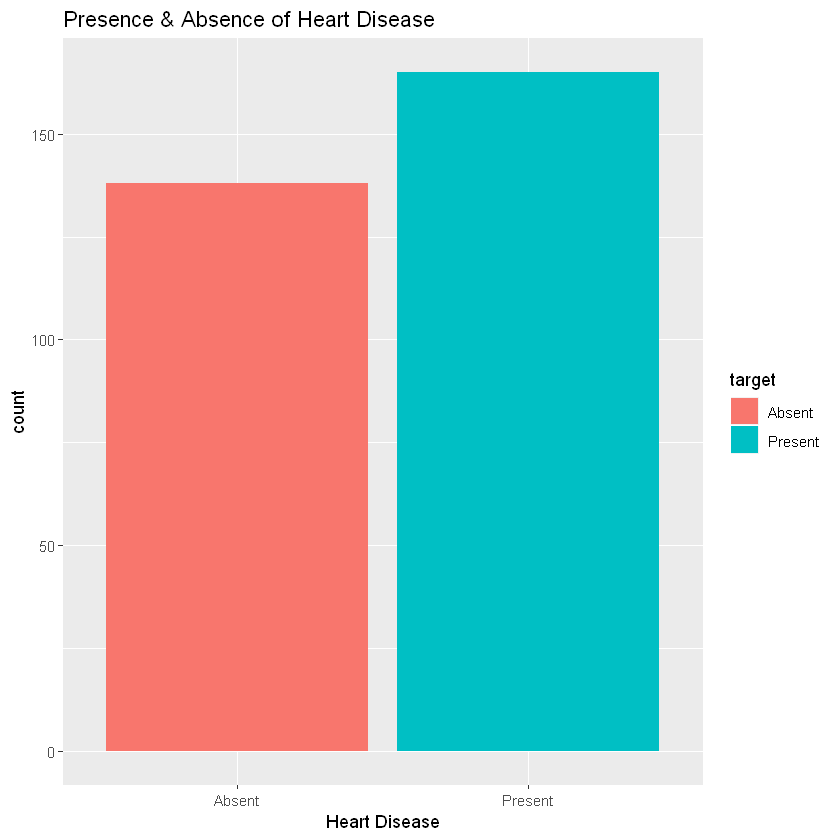

In [88]:
# Bar plot for heart disease

ggplot(heart_data, aes(x=heart_data$target, fill=target))+
   geom_bar()+
   xlab("Heart Disease")+
   ylab("count")+
   ggtitle("Presence & Absence of Heart Disease")

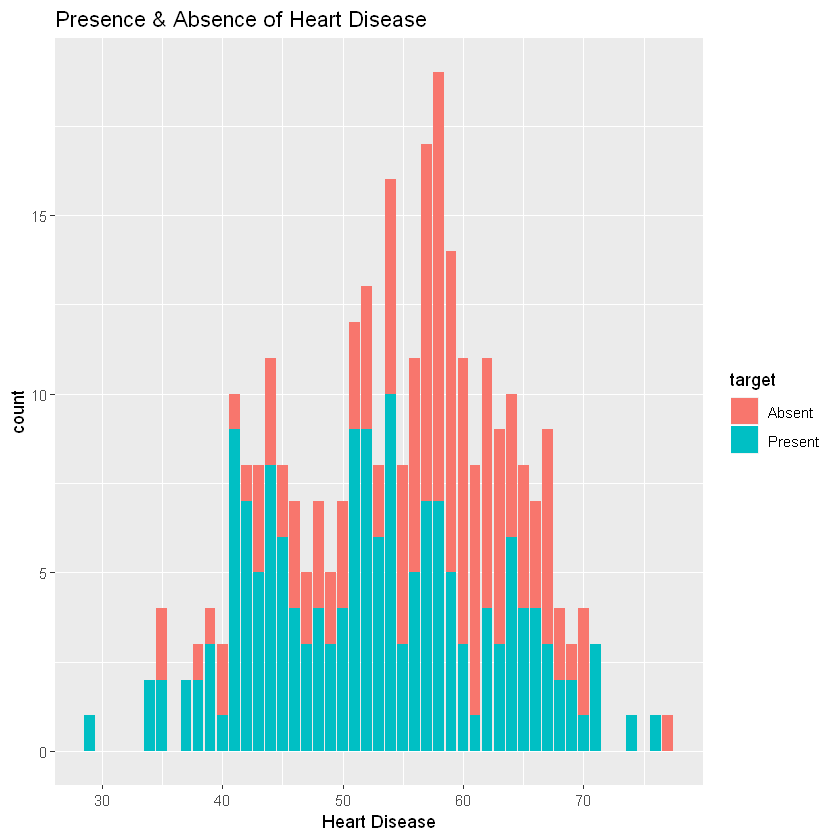

In [89]:
# age wise heart disease data
ggplot(heart_data, aes(x=heart_data$ï..age, fill=target))+
   geom_bar()+
   xlab("Heart Disease")+
   ylab("count")+
   ggtitle("Presence & Absence of Heart Disease")

# Dividing the age into different age group for better understanding

In [90]:
heart_data$age_bar=if_else(heart_data$ï..age>70,">70 years",if_else(heart_data$ï..age>60,"60-70",if_else(heart_data$ï..age>50,'50-60',
                                                                                               if_else(heart_data$ï..age>40,"40-50",
                                                                                                       
                                                                                            if_else(heart_data$ï..age>30,"30-40","less than 30 yrs")))))

In [91]:
tail(heart_data)

,ï..age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bar
298,59,MALE,ASYMPTOMATIC,164,176,>120,NORMAL,90,NO,1.0,1,2,1,Absent,50-60
299,57,FEMALE,ASYMPTOMATIC,140,241,<=120,ABNORMALITY,123,YES,0.2,1,0,3,Absent,50-60
300,45,MALE,ASYMPTOMATIC,110,264,<=120,ABNORMALITY,132,NO,1.2,1,0,3,Absent,40-50
301,68,MALE,ASYMPTOMATIC,144,193,>120,ABNORMALITY,141,NO,3.4,1,2,3,Absent,60-70
302,57,MALE,ASYMPTOMATIC,130,131,<=120,ABNORMALITY,115,YES,1.2,1,1,3,Absent,50-60
303,57,FEMALE,ATYPICAL ANGINA,130,236,<=120,NORMAL,174,NO,0.0,1,1,2,Absent,50-60


In [92]:
heart_data$age_bar=as.factor(heart_data$age_bar)

ERROR: Error in table(dep, indep): all arguments must have the same length


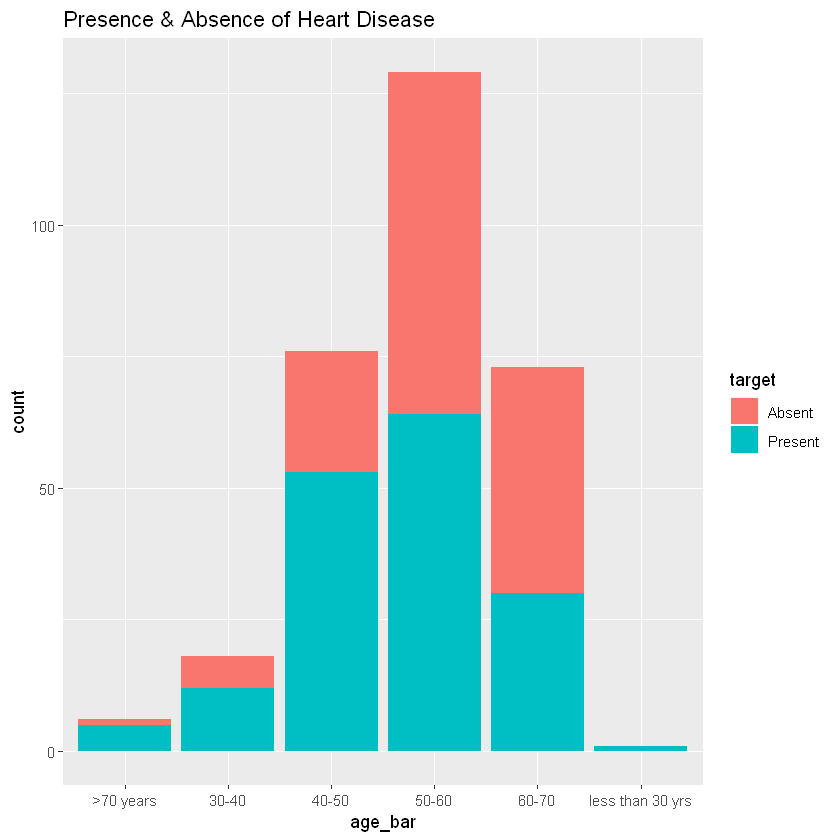

In [93]:
ggplot(heart_data,aes(x=age_bar,fill=target))+geom_bar()+ ggtitle("Presence & Absence of Heart Disease")
crosstab(heart_data$age_bar,heart_data$disease,prop.r = T,plot = FALSE)

In [ ]:
table(heart_data$sex)
# There is a imbalance between male and female data

ERROR: Error in table(dep, indep): all arguments must have the same length


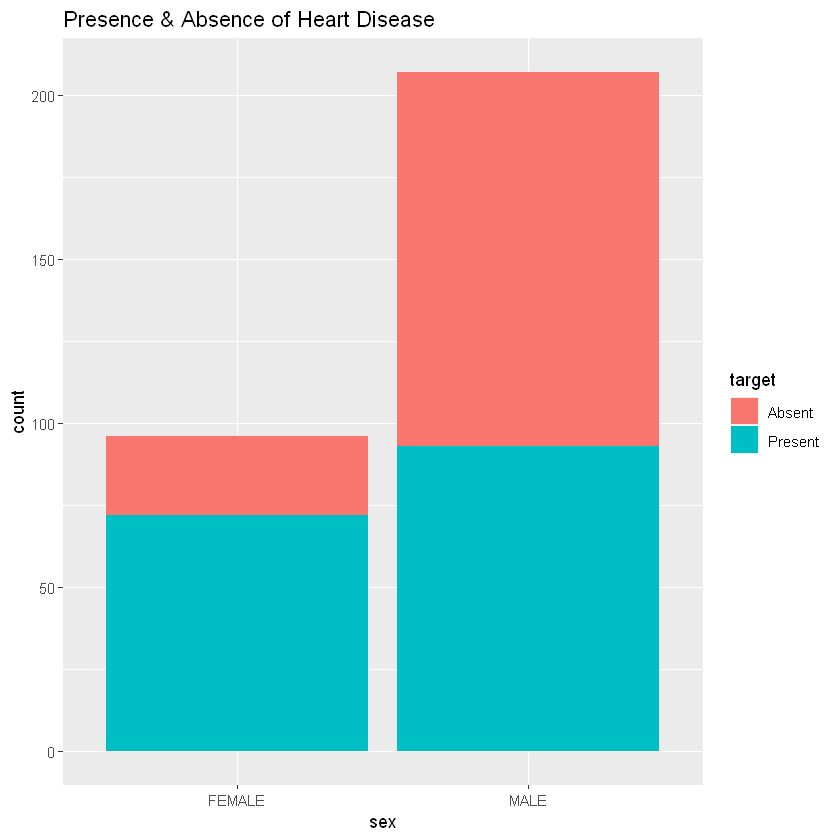

In [94]:
# comapre Heart disease Genderwise

heart_data %>%
  ggplot(aes(x=sex,fill=target))+ 
  geom_bar()+ ggtitle("Presence & Absence of Heart Disease")
crosstab(heart_data$sex,heart_data$disease,prop.r = T,plot = FALSE)
 

Female are more prone to heart disease as compared to male.

ERROR: Error in table(dep, indep): all arguments must have the same length


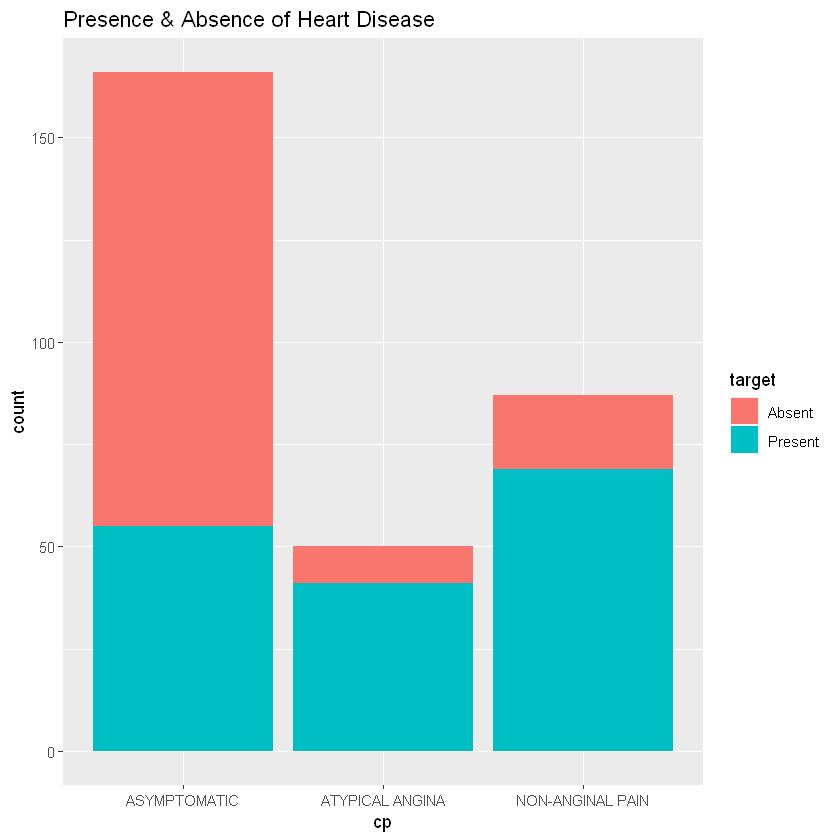

In [95]:
# Chest pain analysis
#cp

#Chest pain type

heart_data %>%
  ggplot(aes(x=cp,fill=target))+ 
  geom_bar()+ ggtitle("Presence & Absence of Heart Disease")
crosstab(heart_data$cp,heart_data$disease,prop.r = T,plot = FALSE)
 


Here we see that it is very difficult to tell whether a patient has a heart disease attending just to the symptoms of the patients.

In [96]:
#trestbps

# Resting blood pressure in millimeters of mercury (mm Hg) when the patient was admitted to the hospital.

resting_bp= heart_data %>%
  mutate(resting_bps=case_when(100<=trestbps & trestbps<=130~'Normal', 
                   130<trestbps & trestbps<=140~'Moderately high',
                   140<trestbps & trestbps<=160~'Very high',
        
                   TRUE~'>160 extreamly high'))


In [97]:
resting_bp

ï..age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bar,resting_bps
63,MALE,ASYMPTOMATIC,145,233,>120,NORMAL,150,NO,2.3,0,0,1,Present,60-70,Very high
37,MALE,NON-ANGINAL PAIN,130,250,<=120,ABNORMALITY,187,NO,3.5,0,0,2,Present,30-40,Normal
41,FEMALE,ATYPICAL ANGINA,130,204,<=120,NORMAL,172,NO,1.4,2,0,2,Present,40-50,Normal
56,MALE,ATYPICAL ANGINA,120,236,<=120,ABNORMALITY,178,NO,0.8,2,0,2,Present,50-60,Normal
57,FEMALE,ASYMPTOMATIC,120,354,<=120,ABNORMALITY,163,YES,0.6,2,0,2,Present,50-60,Normal
57,MALE,ASYMPTOMATIC,140,192,<=120,ABNORMALITY,148,NO,0.4,1,0,1,Present,50-60,Moderately high
56,FEMALE,ATYPICAL ANGINA,140,294,<=120,NORMAL,153,NO,1.3,1,0,2,Present,50-60,Moderately high
44,MALE,ATYPICAL ANGINA,120,263,<=120,ABNORMALITY,173,NO,0.0,2,0,3,Present,40-50,Normal
52,MALE,NON-ANGINAL PAIN,172,199,>120,ABNORMALITY,162,NO,0.5,2,0,3,Present,50-60,>160 extreamly high
57,MALE,NON-ANGINAL PAIN,150,168,<=120,ABNORMALITY,174,NO,1.6,2,0,2,Present,50-60,Very high


ERROR: Error in table(dep, indep): all arguments must have the same length


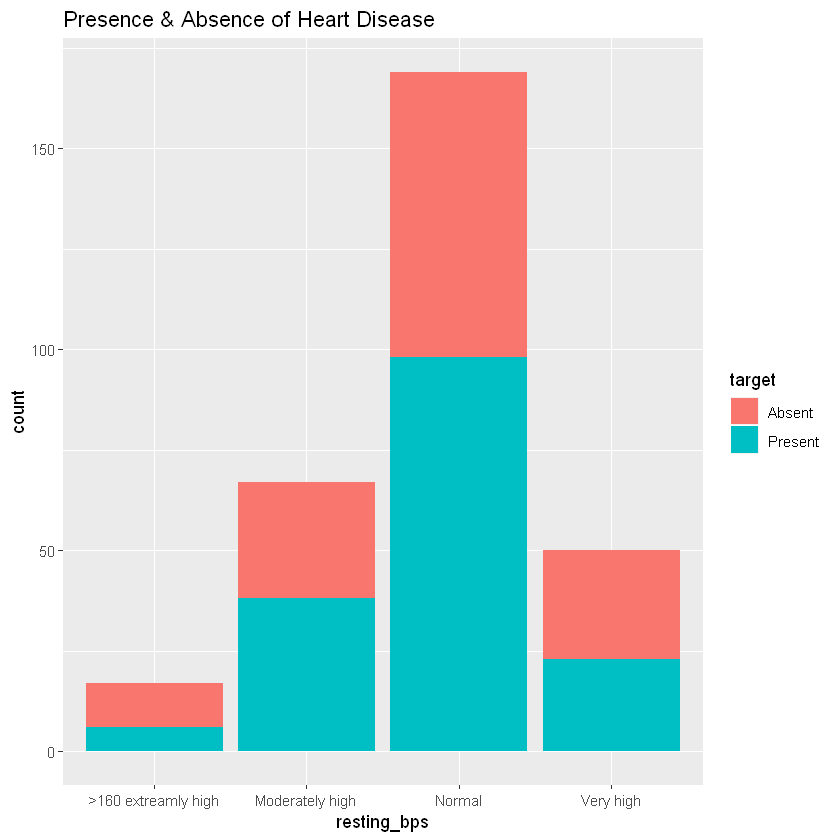

In [98]:
resting_bp %>%
  ggplot(aes(x=resting_bps,fill=target))+ 
  geom_bar()+ ggtitle("Presence & Absence of Heart Disease")
crosstab(resting_bp$resting_bps,heart_data$disease,prop.r = T,plot = FALSE)

In [ ]:
# Cholestrol
ggplot(heart_data, aes(chol, fill=target)) +
  geom_histogram(binwidth=10) +
 ggtitle("Presence & Absence of Heart Disease")

ERROR: Error in table(dep, indep): all arguments must have the same length


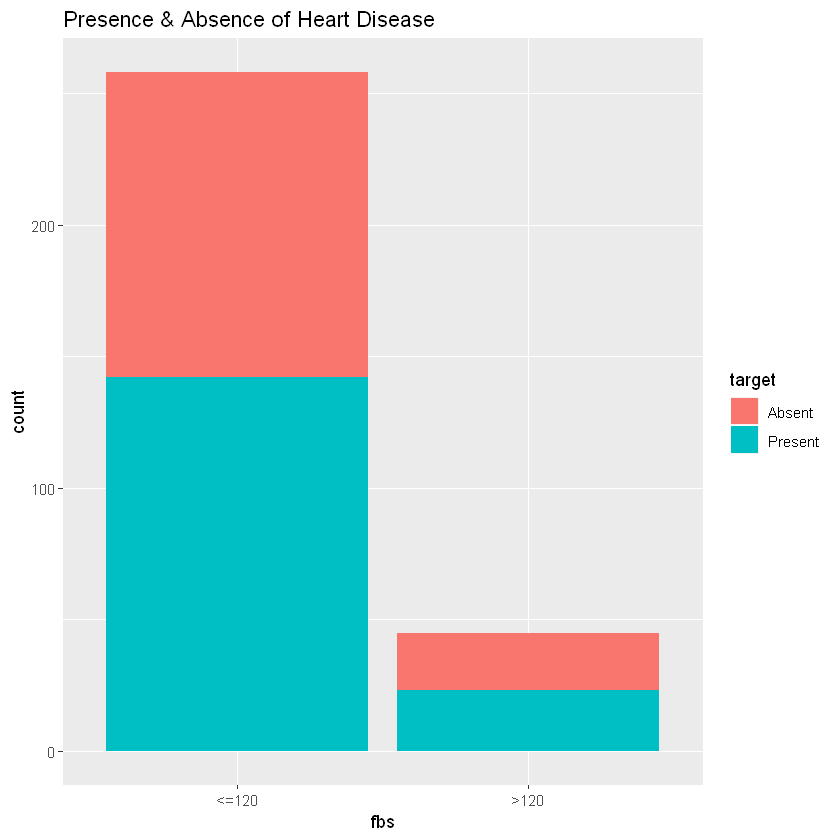

In [99]:
heart_data$fbs=as.factor(heart_data$fbs)
ggplot(heart_data, aes(fbs, fill=target)) +
  geom_bar() + ggtitle("Presence & Absence of Heart Disease")


crosstab(heart_data$fbs,heart_data$disease,prop.r = T,plot = FALSE)


There is no concluding evidence about the sugar level effect on heart disease.

ERROR: Error in table(dep, indep): all arguments must have the same length


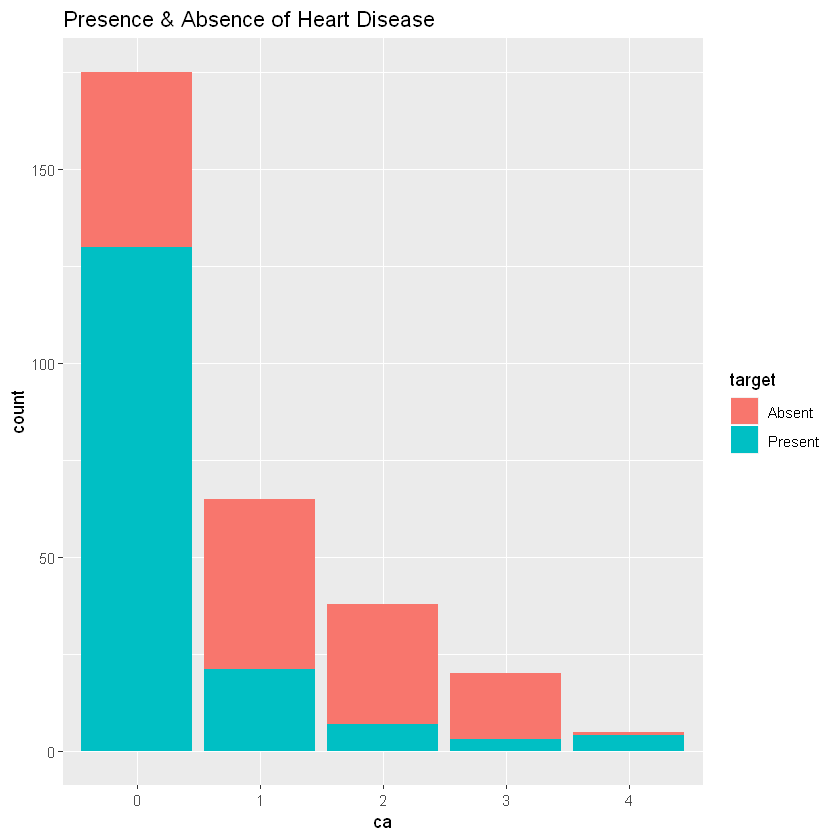

In [100]:
#ca
#This feature refers to the number of narrow blood vessels seen

ggplot(heart_data, aes(ca, fill=target)) +
  geom_bar() + ggtitle("Presence & Absence of Heart Disease")

crosstab(heart_data$ca,heart_data$disease,prop.r = T,plot = FALSE)



In [ ]:
# Corelation between independent variable
library(corrplot)
corr_heart= heart_data[,sapply(heart_data,is.numeric)]
str(corr_heart)
cor(corr_heart)

# Model Building


In [101]:
library(caret)

TraindataRows = createDataPartition(heart_data$target, p=0.7, list= FALSE)
trainData = heart_data[TraindataRows,]
testData = heart_data[-TraindataRows,]

In [102]:
AUC = list()
Accuracy = list()

Logistics Regression

In [103]:
install.packages('e1071', dependencies = TRUE)


  There is a binary version available but the source version is later:
      binary source needs_compilation
e1071  1.7-6 1.7-11              TRUE

  Binaries will be installed
package 'e1071' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'e1071'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying G:\Anaconda\envs\Rprograming\Lib\R\library\00LOCK\e1071\libs\x64\e1071.dll to G:\Anaconda\envs\Rprograming\Lib\R\library\e1071\libs\x64\e1071.dll: Permission denied"Warning message:
"restored 'e1071'"


The downloaded binary packages are in
	C:\Users\e015tx\AppData\Local\Temp\Rtmp6hpCc8\downloaded_packages


In [104]:
install.packages("pROC")


  There is a binary version available but the source version is later:
       binary source needs_compilation
pROC 1.17.0.1 1.18.0              TRUE

  Binaries will be installed


Warning message:
"package 'pROC' is in use and will not be installed"

In [105]:
set.seed(10)
logRegModel = train(target ~ ., data=trainData, method = 'glm', family = 'binomial')
logRegPrediction = predict(logRegModel, testData)
logRegPredictionprob = predict(logRegModel, testData, type='prob')[2]
logRegConfMat = confusionMatrix(logRegPrediction, testData[,"target"])
#ROC Curve
library(pROC)
AUC$logReg = roc(as.numeric(testData$target),as.numeric(as.matrix((logRegPredictionprob))))$auc
Accuracy$logReg = logRegConfMat$overall['Accuracy']

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading

In [106]:
# Support Vector Machine


install.packages('kernlab')
fitControl = trainControl(method = "repeatedcv",
                           number = 5,
                           repeats = 5,
                           ## Estimate class probabilities
                           classProbs = TRUE,
                           ## Evaluate performance using 
                           ## the following function
                           summaryFunction = twoClassSummary)


set.seed(10)
svmModel = train(target ~ ., data = trainData,
                  method = "svmRadial", 
                  trControl = fitControl ,
                  preProcess = c("center", "scale"),
                  tunelength = 8,
                  metric = "ROC")
svmPrediction = predict(svmModel, testData)
svmPredictionprob = predict(svmModel, testData, type='prob')[2]
svmConfMat = confusionMatrix(svmPrediction, testData[,"target"])
#ROC Curve
library(pROC)
AUC$svm = roc(as.numeric(testData$target),as.numeric(as.matrix((svmPredictionprob))))$auc
Accuracy$svm = svmConfMat$overall['Accuracy']



  There is a binary version available but the source version is later:
        binary source needs_compilation
kernlab 0.9-29 0.9-31              TRUE

  Binaries will be installed
package 'kernlab' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'kernlab'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying G:\Anaconda\envs\Rprograming\Lib\R\library\00LOCK\kernlab\libs\x64\kernlab.dll to G:\Anaconda\envs\Rprograming\Lib\R\library\kernlab\libs\x64\kernlab.dll: Permission denied"Warning message:
"restored 'kernlab'"


The downloaded binary packages are in
	C:\Users\e015tx\AppData\Local\Temp\Rtmp6hpCc8\downloaded_packages


Setting levels: control = 1, case = 2
Setting direction: controls < cases


In [107]:
# Random Forest
library(randomForest)
set.seed(10)
RFModel = randomForest(target ~ .,
                    data=trainData, 
                    importance=TRUE, 
                    ntree=200)
#varImpPlot(RFModel)
RFPrediction = predict(RFModel, testData)
RFPredictionprob = predict(RFModel,testData,type="prob")[, 2]

RFConfMat = confusionMatrix(RFPrediction, testData[,"target"])

AUC$RF = roc(as.numeric(testData$target),as.numeric(as.matrix((RFPredictionprob))))$auc
Accuracy$RF = RFConfMat$overall['Accuracy']

Setting levels: control = 1, case = 2
Setting direction: controls < cases


In [108]:
row.names = names(Accuracy)
col.names = c("AUC", "Accuracy")
cbind(as.data.frame(matrix(c(AUC,Accuracy),nrow = 3, ncol = 2,
                           dimnames = list(row.names, col.names))))

,AUC,Accuracy
logReg,0.9472374,0.8666667
svm,0.9293181,0.8333333
RF,0.9235938,0.8444444


In [109]:
logRegConfMat

Confusion Matrix and Statistics

          Reference
Prediction Absent Present
   Absent      36       7
   Present      5      42
                                          
               Accuracy : 0.8667          
                 95% CI : (0.7787, 0.9292)
    No Information Rate : 0.5444          
    P-Value [Acc > NIR] : 6.754e-11       
                                          
                  Kappa : 0.7323          
                                          
 Mcnemar's Test P-Value : 0.7728          
                                          
            Sensitivity : 0.8780          
            Specificity : 0.8571          
         Pos Pred Value : 0.8372          
         Neg Pred Value : 0.8936          
             Prevalence : 0.4556          
         Detection Rate : 0.4000          
   Detection Prevalence : 0.4778          
      Balanced Accuracy : 0.8676          
                                          
       'Positive' Class : Absent          
         

So here accuracy rate is 86 % which is quite good.

In [110]:
RFConfMat


Confusion Matrix and Statistics

          Reference
Prediction Absent Present
   Absent      34       7
   Present      7      42
                                          
               Accuracy : 0.8444          
                 95% CI : (0.7528, 0.9123)
    No Information Rate : 0.5444          
    P-Value [Acc > NIR] : 1.629e-09       
                                          
                  Kappa : 0.6864          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8293          
            Specificity : 0.8571          
         Pos Pred Value : 0.8293          
         Neg Pred Value : 0.8571          
             Prevalence : 0.4556          
         Detection Rate : 0.3778          
   Detection Prevalence : 0.4556          
      Balanced Accuracy : 0.8432          
                                          
       'Positive' Class : Absent          
         

In [111]:
svmConfMat

Confusion Matrix and Statistics

          Reference
Prediction Absent Present
   Absent      35       9
   Present      6      40
                                        
               Accuracy : 0.8333        
                 95% CI : (0.74, 0.9036)
    No Information Rate : 0.5444        
    P-Value [Acc > NIR] : 7.067e-09     
                                        
                  Kappa : 0.666         
                                        
 Mcnemar's Test P-Value : 0.6056        
                                        
            Sensitivity : 0.8537        
            Specificity : 0.8163        
         Pos Pred Value : 0.7955        
         Neg Pred Value : 0.8696        
             Prevalence : 0.4556        
         Detection Rate : 0.3889        
   Detection Prevalence : 0.4889        
      Balanced Accuracy : 0.8350        
                                        
       'Positive' Class : Absent        
                                        

# So here Logistic Regression model gives higest accuracy.